In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sb

root = os.path.dirname(os.getcwd())
data_root = '/Users/jorgemarpa/Work/UCB/data/'

# Metadata

In [2]:
meta = np.load('%s/full/param_arr_gridandfiller123_25052021.npy' % (data_root))
meta = pd.DataFrame(meta, columns=['m_dust', 'Rc', 'f_exp', 'H0', 
                                   'Rin', 'sd_exp', 'alpha', 'inc', 'MC'],
                    dtype=np.float32)
meta.head()

,m_dust,Rc,f_exp,H0,Rin,sd_exp,alpha,inc,MC
0,0.000278,269.600006,1.173,23.200001,0.4,-0.732055,0.00007,75.372246,0.0
1,0.000278,269.600006,1.173,23.200001,0.4,-0.732055,0.00007,78.344276,0.0
2,0.000278,269.600006,1.173,23.200001,0.4,-0.732055,0.00007,81.284813,0.0
3,0.000278,269.600006,1.173,23.200001,0.4,-0.732055,0.00007,84.202362,0.0
4,0.000278,269.600006,1.173,23.200001,0.4,-0.732055,0.00007,87.104897,0.0


In [3]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73767 entries, 0 to 73766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_dust  73767 non-null  float32
 1   Rc      73767 non-null  float32
 2   f_exp   73767 non-null  float32
 3   H0      73767 non-null  float32
 4   Rin     73767 non-null  float32
 5   sd_exp  73767 non-null  float32
 6   alpha   73767 non-null  float32
 7   inc     73767 non-null  float32
 8   MC      73767 non-null  float32
dtypes: float32(9)
memory usage: 2.5 MB


In [4]:
meta.describe()

,m_dust,Rc,f_exp,H0,Rin,sd_exp,alpha,inc,MC
count,7.376700e+04,73767.000000,73767.000000,73767.000000,73767.000000,73767.000000,73767.000000,73767.000000,73767.000000
mean,2.934836e-04,146.797043,1.152761,17.045263,2.938394,-0.727401,0.000666,84.261337,0.011496
std,3.346303e-04,97.030930,0.083582,6.143250,3.740439,0.344738,0.000638,6.099834,0.106600
min,1.500000e-07,10.000000,1.000000,5.000000,0.100000,-1.499993,0.000003,52.692574,0.000000
25%,5.910000e-05,75.500000,1.056000,12.200000,0.200000,-1.000000,0.000100,81.284813,0.000000
50%,1.500000e-04,100.000000,1.150000,18.100000,1.000000,-0.667346,0.000800,87.104897,0.000000
75%,4.080000e-04,242.199997,1.250000,22.200001,4.700000,-0.500000,0.001000,90.000000,0.000000
max,1.200000e-03,300.000000,1.300000,25.000000,10.000000,-0.000020,0.003000,90.000000,1.000000


In [5]:
meta.loc[:, 'MC'].value_counts()

0.0    72919
1.0      848
Name: MC, dtype: int64

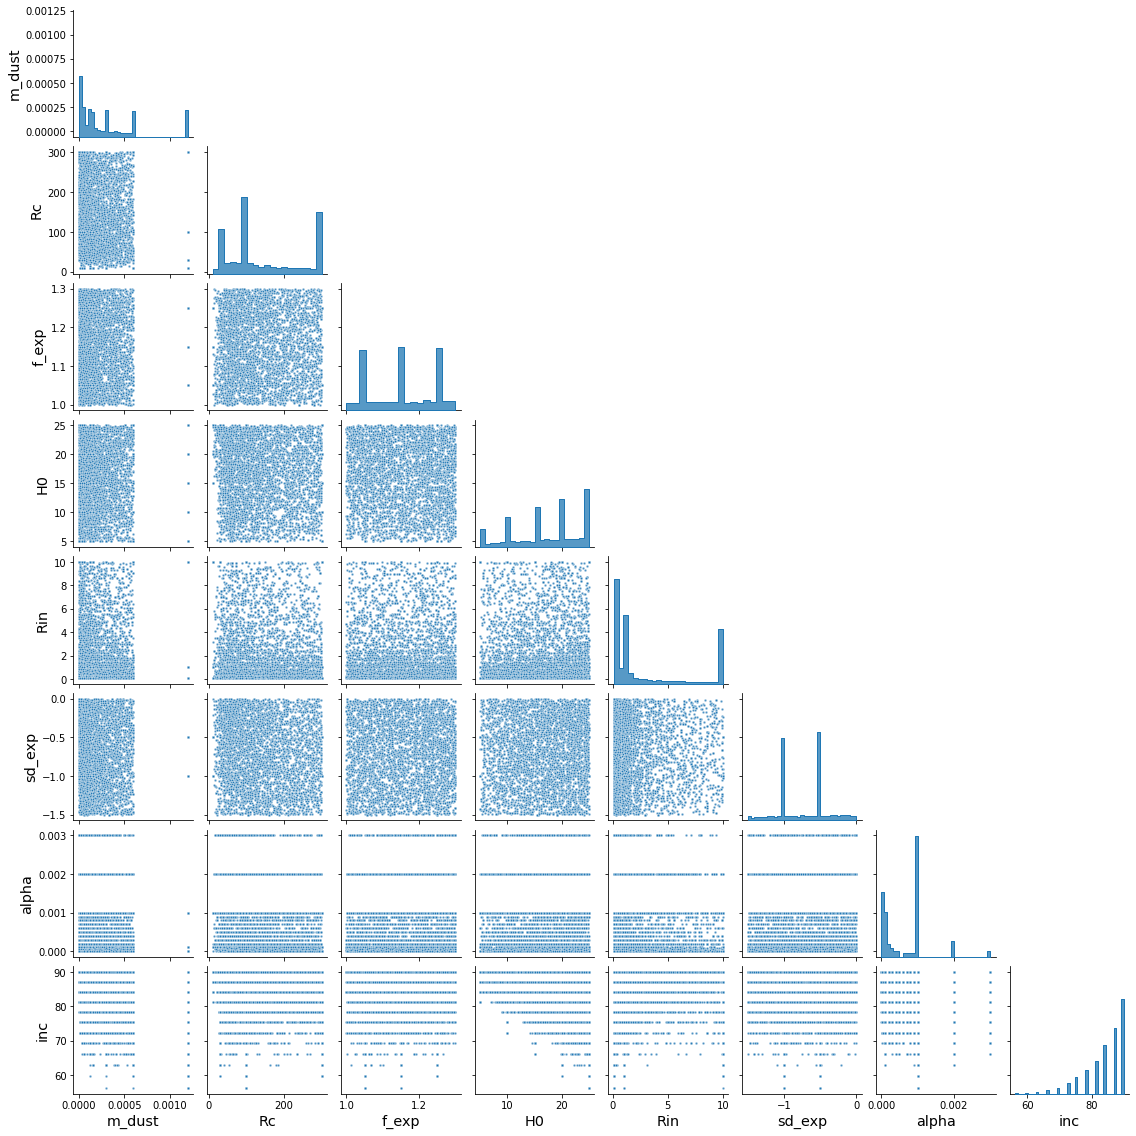

In [9]:
g = sb.pairplot(meta.iloc[:, :-1].sample(10000), diag_kind='hist', markers='.',height=2,
                plot_kws=dict(s=25, edgecolors='face', alpha=.8),
                diag_kws=dict(element='step'))
for ax in g.axes.flat:
    # This only works for the left ylabels
    ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')
    ax.set_xlabel(ax.get_xlabel(), fontsize='x-large')
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()

In [36]:
N, edge = np.histogram(meta.f_exp, bins=200)
edge = (edge[1:] + edge[:-1])/2

In [37]:
edge[(N > 8000)]

array([1.05025  , 1.1507499, 1.2497499], dtype=float32)

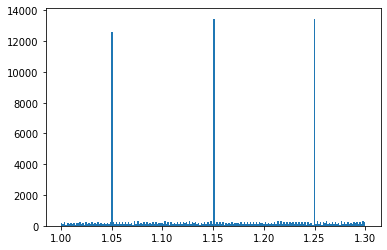

In [34]:
plt.hist(meta.f_exp, bins=200);

In [53]:
grid_mask_h0 = (np.isclose(meta.H0, 5, atol=1e-7) | 
             np.isclose(meta.H0, 10, atol=1e-7) | 
             np.isclose(meta.H0, 15, atol=1e-7) |
             np.isclose(meta.H0, 20, atol=1e-7) |
             np.isclose(meta.H0, 25, atol=1e-7)
            )
grid_mask_h0.sum()

39695

In [54]:
grid_mask_fexp = (
    np.isclose(meta.f_exp, 1.05, atol=1e-7) | 
    np.isclose(meta.f_exp, 1.15, atol=1e-7) | 
    np.isclose(meta.f_exp, 1.25, atol=1e-7)
)
grid_mask_fexp.sum()

39272

In [56]:
(grid_mask_fexp & grid_mask_h0).sum()

38978

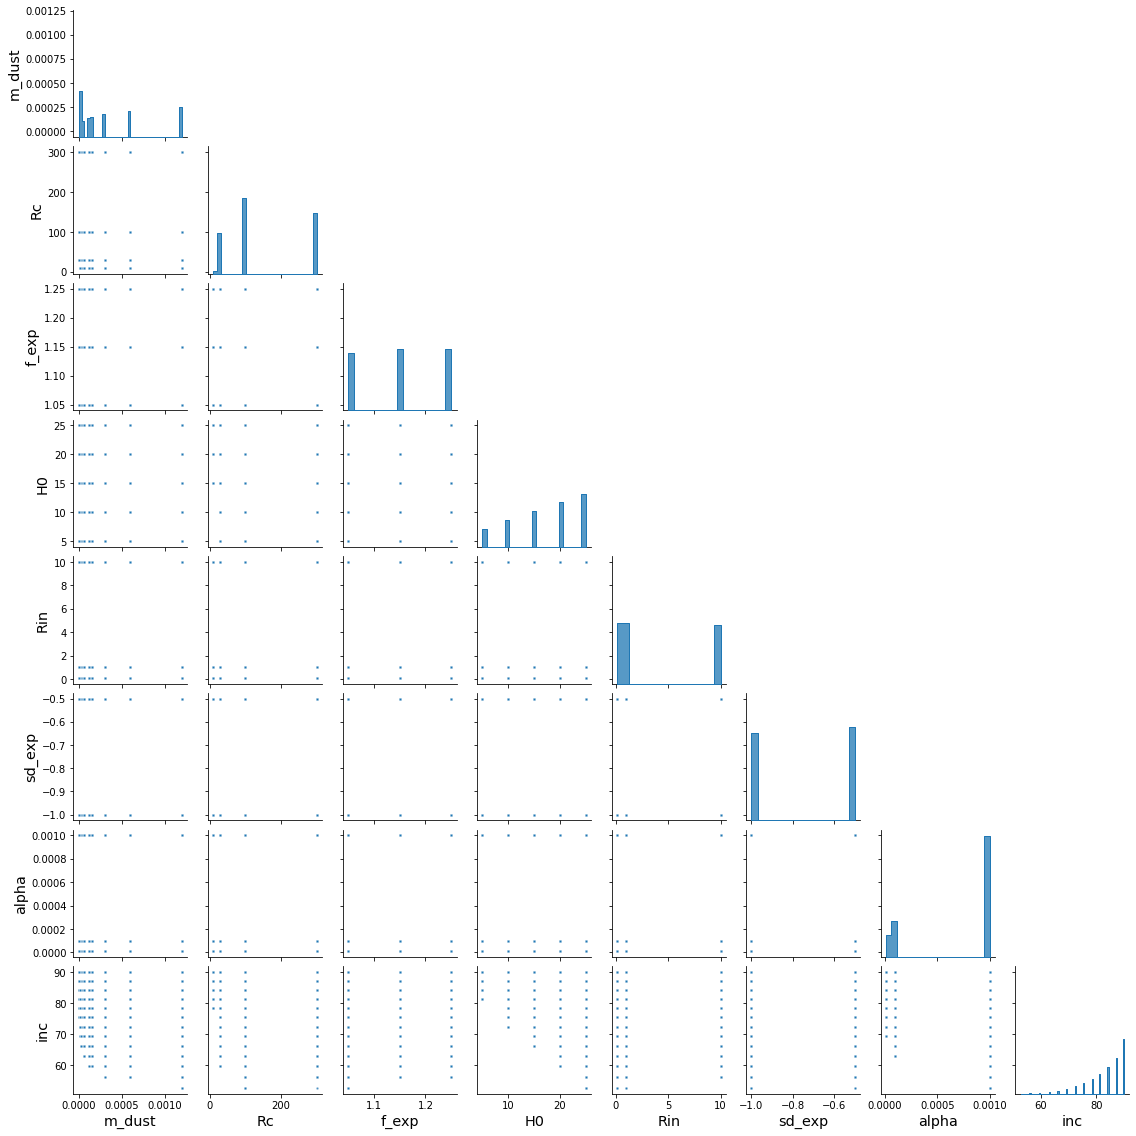

In [55]:
g = sb.pairplot(meta.iloc[:, :-1][grid_mask_fexp & grid_mask_h0], diag_kind='hist', markers='.',height=2,
                plot_kws=dict(s=25, edgecolors='face', alpha=.8),
                diag_kws=dict(element='step'))
for ax in g.axes.flat:
    # This only works for the left ylabels
    ax.set_ylabel(ax.get_ylabel(), fontsize='x-large')
    ax.set_xlabel(ax.get_xlabel(), fontsize='x-large')
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
plt.show()

# Synthetic Images

In [9]:
imgs = np.load('%s/full/img_array_gridandfiller123_25052021.npy' % (data_root))
imgs = np.expand_dims(imgs, axis=1)
imgs.shape

(73767, 1, 187, 187)

In [11]:
print('Min ', imgs.min(), 'Max ', imgs.max())
print('Mean ', imgs.mean(), 'Std ', imgs.std())

Min  0.0 Max  3.4867163e-15
Mean  1.2038798e-20 Std  7.795394e-19


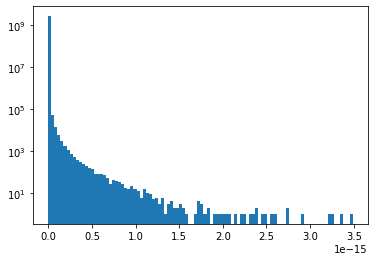

In [12]:
plt.hist(imgs.flatten(), bins=100, log=True)
plt.show()

In [150]:
def normalize(x, mode='global', a=0, b=1):
    if mode == 'global':
        xmin = x.min()
        xmax = x.max()
        xn = (x - xmin) * (b - a) / (xmax - xmin)
        return xn, xmin, xmax
    elif mode == 'local':
        xmin = imgs.reshape(
            imgs.shape[0], np.product(
                imgs.shape[1:])).min(axis=1)[:, None, None, None]
        xmax = imgs.reshape(
            imgs.shape[0], np.product(
                imgs.shape[1:])).max(axis=1)[:, None, None, None]
        xn = (x - xmin) * (b - a) / (xmax - xmin)
        return xn, xmin, xmax
    else:
        print('Wrong mode')

In [151]:
imgs_n, nmin, nmax = normalize(imgs, mode='local', b=1-1e-5)

In [152]:
imgs_n.max(axis=-1).max(axis=-1)

array([[0.99999   ],
       [0.99999   ],
       [0.99999   ],
       ...,
       [0.99999005],
       [0.99999   ],
       [0.99999005]], dtype=float32)

In [153]:
print('Min ', imgs_n.min(), 'Max ', imgs_n.max())
print('Mean ', imgs_n.mean(), 'Std ', imgs_n.std())

Min  0.0 Max  0.99999005
Mean  0.0030561571 Std  0.035637632


In [154]:
def plot_wall(x):
    """Light-curves wall plot, function used during VAE training phase.
    Figure designed and ready to be appended to W&B logger.

    Parameters
    ----------
    xhat : numpy array
        Array of generated light curves
    x    : numpy array
        List of real light curves.
    epoch: int, optional
        Epoch number

    Returns
    -------
    fig
        a matplotlib figure
    image
        an image version of the figure
    """

    plt.close('all')
    ncols = 10
    v_min, lin, v_max = np.percentile(x, [0, 80, 100])
    print(v_min, lin, v_max)
    norm = colors.SymLogNorm(linthresh=lin, linscale=100, base=10,
                             vmin=v_min, vmax=v_max)
    fig, axis = plt.subplots(nrows=ncols, ncols=ncols, figsize=(ncols, ncols))
    for i, ax in enumerate(axis.ravel()):
        ax.imshow(x[i, 0, :, :], interpolation='bilinear',
                  cmap=cm.viridis, origin='upper', aspect='equal',)
                  #norm=norm)

    for ax in axis.ravel():
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    fig.subplots_adjust(wspace=0.05, hspace=0.05)#, left=0, right=1)
    #plt.tight_layout()
    #fig.suptitle('Synthetic Images', fontsize=20, y=.95)
    plt.show()
    return

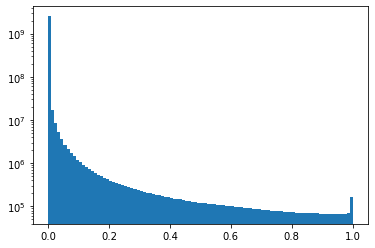

In [155]:
plt.hist(imgs_n.flatten(), bins=100, log=True)
plt.show()

0.0 2.5494080097214275e-26 1.8930741678836304e-15


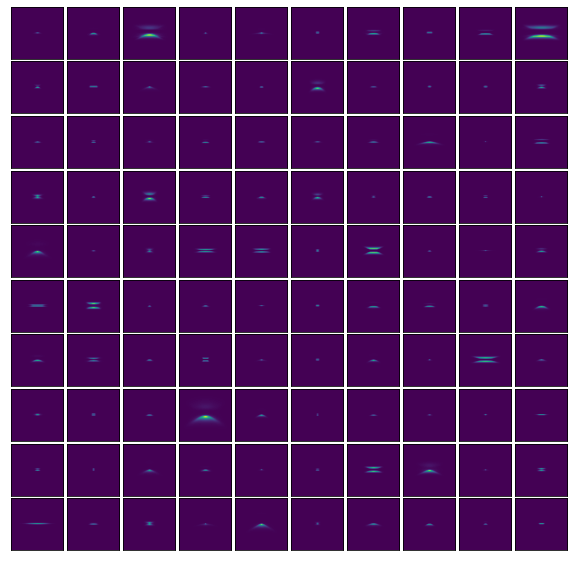

In [156]:
idx = np.random.randint(0, imgs.shape[0], size=100)
plot_wall(imgs[idx])

0.0 7.87905332089168e-09 0.9999900460243225


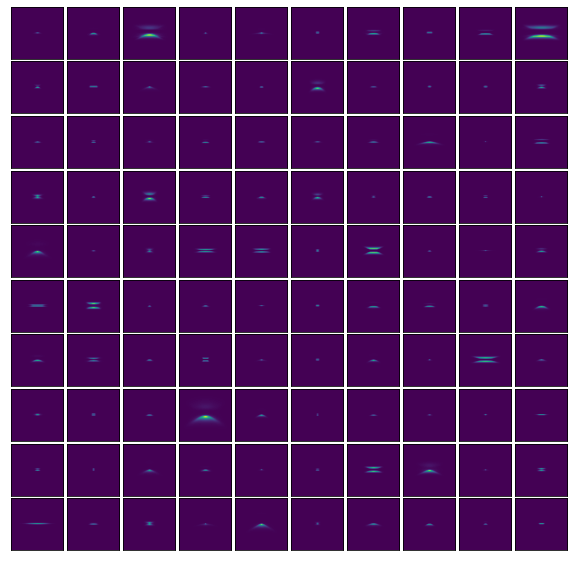

In [157]:
plot_wall(imgs_n[idx])

In [158]:
meta.iloc[idx].describe()

,m_dust,Rc,f_exp,H0,Rin,sd_exp,alpha,inc,MC
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,0.000317,149.056000,1.131720,16.664001,3.284000,-0.712848,0.000686,83.403770,0.0
std,0.000314,95.409477,0.084649,6.088896,4.098478,0.359974,0.000593,7.078128,0.0
min,0.000002,10.000000,1.028000,5.000000,0.100000,-1.493480,0.000006,56.249058,0.0
25%,0.000060,99.375000,1.050000,12.400000,0.200000,-1.000000,0.000100,78.344276,0.0
50%,0.000291,100.000000,1.110000,17.800000,1.000000,-0.508688,0.001000,87.104897,0.0
75%,0.000526,236.924995,1.240250,20.025000,9.450000,-0.500000,0.001000,90.000000,0.0
max,0.001200,300.000000,1.296000,25.000000,10.000000,-0.005412,0.003000,90.000000,0.0


## Filter by flaring exponent

In [159]:
f1_idx = meta.query('MC == 0').index.values
meta_f1 = meta.iloc[f1_idx]
imgs_f1 = imgs[f1_idx]
imgs_n_f1 = imgs_n[f1_idx]
meta_f1.shape, imgs_f1.shape, imgs_n_f1.shape

((72919, 9), (72919, 1, 187, 187), (72919, 1, 187, 187))

0.0 2.256806373723837e-11 0.9999900460243225


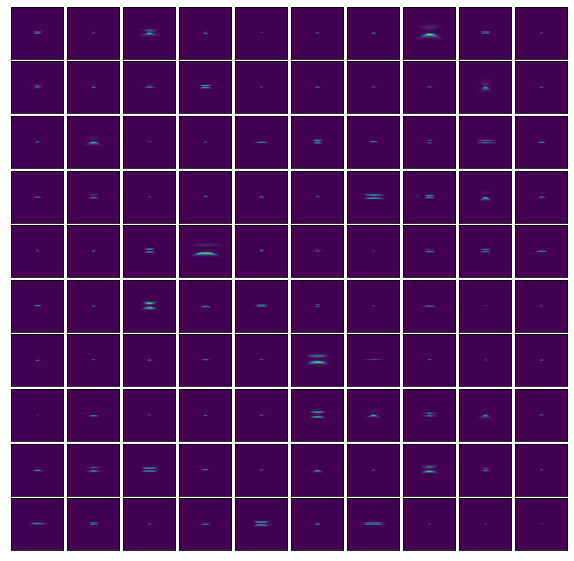

In [160]:
idx = np.random.randint(0, imgs_n_f1.shape[0], size=100)
plot_wall(imgs_n_f1[idx])

# Train / Val / Test splits

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
train_idx, test_idx = train_test_split(np.arange(meta_f1.shape[0]), 
                                       test_size=.2, random_state=99)
train_idx.shape, test_idx.shape

((58335,), (14584,))

In [163]:
np.save('%s/imgs/PPD/partitions/param_arr_gridandfiller_25052021_train_all.npy' % 
        (exa_root), meta_f1.iloc[train_idx, :-1].values.astype(np.float32))
np.save('%s/imgs/PPD/partitions/param_arr_gridandfiller_25052021_test.npy' % 
        (exa_root), meta_f1.iloc[test_idx, :-1].values.astype(np.float32))

np.save('%s/imgs/PPD/partitions/img_array_gridandfiller_imagenorm_25052021_train_all.npy' % 
        (exa_root), imgs_n_f1[train_idx])
np.save('%s/imgs/PPD/partitions/img_array_gridandfiller_imagenorm_25052021_test.npy' % 
        (exa_root), imgs_n_f1[test_idx])

# Separate images by batches

In [164]:
n_batches = 5
batch_lims = np.linspace(0, train_idx.shape[0], n_batches+1, dtype=int)
print(batch_lims)

[    0 11667 23334 35001 46668 58335]


In [165]:
train_imgs = imgs_n_f1[train_idx]
train_pars = meta_f1.iloc[train_idx, :-1].values.astype(np.float32)

In [166]:
train_imgs.max(axis=-1).max(axis=-1), train_imgs.max()

(array([[0.99999   ],
        [0.99999005],
        [0.99999005],
        ...,
        [0.99999   ],
        [0.9999899 ],
        [0.9999899 ]], dtype=float32),
 0.99999005)

In [167]:
counter = 0
for k in range(n_batches):
    print([batch_lims[k] , batch_lims[k+1]])
    aux_img = train_imgs[batch_lims[k] : batch_lims[k+1]]
    aux_par = train_pars[batch_lims[k] : batch_lims[k+1]]
    print(aux_par.shape)
    counter += aux_par.shape[0]
    
    np.save('%s/imgs/PPD/partitions/param_arr_gridandfiller_25052021_train_%i.npy' % 
        (exa_root, k+1), aux_par)
    np.save('%s/imgs/PPD/partitions/img_array_gridandfiller_imagenorm_25052021_train_%i.npy' % 
        (exa_root, k+1), aux_img)
    print('-----------------------')
    
print(counter)

[0, 11667]
(11667, 8)
-----------------------
[11667, 23334]
(11667, 8)
-----------------------
[23334, 35001]
(11667, 8)
-----------------------
[35001, 46668]
(11667, 8)
-----------------------
[46668, 58335]
(11667, 8)
-----------------------
58335
